# IBM DATA SCIENCES PROFESSIONAL CERTIFICATE.

# CAPSTONE PROJECT: THE BATTLE OF NEIGHBORHOODS, CHICAGO.

## IMPORTING LIBRARIES

In [ ]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitud / longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Solving environment: | 

# Week 1

## 1. Scrapping the Data

In [3]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago#List_of_neighborhoods_by_community_area').text

In [4]:
soup = BeautifulSoup(source,'lxml')
My_Table = soup.find('table',{'class':'wikitable sortable'})
My_Table

<table class="wikitable sortable">
<tbody><tr>
<th>Neighborhood</th>
<th>Community area
</th></tr>
<tr>
<td>Albany Park
</td>
<td><a href="/wiki/Albany_Park,_Chicago" title="Albany Park, Chicago">Albany Park</a>
</td></tr>
<tr>
<td><a class="mw-redirect" href="/wiki/Altgeld_Gardens,_Chicago" title="Altgeld Gardens, Chicago">Altgeld Gardens</a>
</td>
<td>Riverdale
</td></tr>
<tr>
<td><a class="mw-redirect" href="/wiki/Andersonville,_Chicago" title="Andersonville, Chicago">Andersonville</a>
</td>
<td>Edgewater
</td></tr>
<tr>
<td>Archer Heights
</td>
<td><a href="/wiki/Archer_Heights,_Chicago" title="Archer Heights, Chicago">Archer Heights</a>
</td></tr>
<tr>
<td>Armour Square
</td>
<td><a href="/wiki/Armour_Square,_Chicago" title="Armour Square, Chicago">Armour Square</a>
</td></tr>
<tr>
<td>Ashburn
</td>
<td><a href="/wiki/Ashburn,_Chicago" title="Ashburn, Chicago">Ashburn</a>
</td></tr>
<tr>
<td>Ashburn Estates
</td>
<td>Ashburn
</td></tr>
<tr>
<td>Auburn Gresham
</td>
<td><a href="/w

In [5]:
headers = My_Table.find_all('th')
headers

[<th>Neighborhood</th>, <th>Community area
 </th>]

In [6]:
# Getting the HEADERS of the first two columns
headers = [th.text.strip() for th in headers]
headers = headers[:2]
x = headers[1].split('\xa0')
x = ' '.join(x)
headers.pop()
headers.append(x)
headers

['Neighborhood', 'Community area']

In [7]:
#Extracting to the table the names of Neighborhoods in Chicago

rows = []
for tr in My_Table.find_all('tr'):
    tds = tr.find_all('td')
    rows.append(tds)
    if not tds:
        continue
del rows[0]

col_0 = []
for i in range(len(rows)):
    col_0.append(rows[i][0])
Locations = []
for location in col_0:
    Locations.append(location.text)
for index, ele in enumerate(Locations):
    if '(' in ele:
        Locations[index] = Locations[index].split('(')[0]
for index, ele in enumerate(Locations):
    if ',' in ele:
        Locations[index] = Locations[index].split(',')[0]        
    
col_1 = []
for i in range(len(rows)):
    col_1.append(rows[i][1])
Boroughs = []
for borough in col_1:
    Boroughs.append(borough.text)
for index, ele in enumerate(Boroughs):
    if '[' in ele:
        Boroughs[index] = Boroughs[index].split('[')[0]
for index, ele in enumerate(Boroughs):
    if ',' in ele:
        Boroughs[index] = Boroughs[index].split(',')[0]    

In [8]:
#Dataframe with the list of Neighborhoods and Community Area in Chicago
df = pd.DataFrame(list(zip(Locations, Boroughs)), columns = headers)
df.head()

,Neighborhood,Community area
0,Albany Park\n,Albany Park\n
1,Altgeld Gardens\n,Riverdale\n
2,Andersonville\n,Edgewater\n
3,Archer Heights\n,Archer Heights\n
4,Armour Square\n,Armour Square\n


## 2. Find the Location (Latitude/Longitude) of Neighborhoods in Chicago

In [9]:
from geopy.extra.rate_limiter import RateLimiter
latitude = []
longitude = []
for i in range(len(Locations)):
    address = str(Locations[i]+', '+ Boroughs[i] + ', Chicago')
    geolocator = Nominatim(user_agent="Chicago_explorer")
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
    location = geolocator.geocode(address)
    try: 
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        latitude.append("Not Found")
        longitude.append("Not Found")
    
print('Coordinates located')

Coordinates located


### Dataframe with Names and Latitude/Longitude information of places in Chicago.

In [10]:
headers.append('Latitude')
headers.append('Longitude')
if len(headers)>4:
    headers = headers[:4]

In [11]:
df_Chicago = pd.DataFrame(list(zip(Locations, Boroughs, latitude, longitude)), 
               columns = headers) 
df_Chicago.head(10)

,Neighborhood,Community area,Latitude,Longitude
0,Albany Park\n,Albany Park\n,41.9719,-87.7162
1,Altgeld Gardens\n,Riverdale\n,41.6549,-87.6004
2,Andersonville\n,Edgewater\n,41.9771,-87.6693
3,Archer Heights\n,Archer Heights\n,41.8114,-87.7262
4,Armour Square\n,Armour Square\n,41.84,-87.6331
5,Ashburn\n,Ashburn\n,41.7494,-87.7135
6,Ashburn Estates\n,Ashburn\n,Not Found,Not Found
7,Auburn Gresham\n,Auburn Gresham\n,41.7508,-87.6629
8,Avalon Park\n,Avalon Park\n,41.745,-87.5887
9,Avondale\n,Avondale\n,41.9389,-87.7112


In [13]:
df_Chicago.shape

(246, 4)

In [13]:
#Delete rows with Latitude and longitude Not Found
df_Chicago_fin = df_Chicago[df_Chicago.Latitude != "Not Found"]
df_Chicago_fin.head(15)

,Neighborhood,Community area,Latitude,Longitude
0,Albany Park\n,Albany Park\n,41.9719,-87.7162
1,Altgeld Gardens\n,Riverdale\n,41.6549,-87.6004
2,Andersonville\n,Edgewater\n,41.9771,-87.6693
3,Archer Heights\n,Archer Heights\n,41.8114,-87.7262
4,Armour Square\n,Armour Square\n,41.84,-87.6331
5,Ashburn\n,Ashburn\n,41.7494,-87.7135
7,Auburn Gresham\n,Auburn Gresham\n,41.7508,-87.6629
8,Avalon Park\n,Avalon Park\n,41.745,-87.5887
9,Avondale\n,Avondale\n,41.9389,-87.7112
11,Back of the Yards\n,New City\n,41.8075,-87.6662


In [14]:
df_Chicago_fin.shape

(190, 4)

#### Quality Control: Getting the Coordinates of Chicago using Geolocator

In [15]:
address = 'Chicago, IL, USA'

geolocator = Nominatim(user_agent="Chicago_explorer")
location = geolocator.geocode(address)
lat_e = location.latitude
long_e = location.longitude
print('The geograpical coordinates of Chicago, Illinois are {}, {}.'.format(lat_e, long_e))

The geograpical coordinates of Chicago, Illinois are 41.8755616, -87.6244212.


# Week 2

### Creating a map of Chicago with neighborhoods superimposed on top.

In [16]:
# create map of Chicago using latitude and longitude values
map_chicago = folium.Map(location=[lat_e, long_e], zoom_start=11)

# add markers to map
for lat, lng, borough, location in zip(df_Chicago_fin['Latitude'], df_Chicago_fin['Longitude'], df_Chicago_fin['Community area'], df_Chicago_fin['Neighborhood']):
    label = '{}, {}'.format(location, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

## Utilizing the Foursquare API to explore the neighborhoods and segment them

#### Defining Foursquare Credentials and Version

In [17]:
LIMIT = 500
CLIENT_ID = '0DSAEW3ODANV1R03KD3OF5LX022QGDFPXVKSRH4NBGQLFA2R' # My Foursquare ID
CLIENT_SECRET = 'WT1UVXGVUJYN23G4SU2BVNOASOCNP0RISVKP0ICVE050FPYE' # My Foursquare Client Secret
VERSION = '20200522' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: 0DSAEW3ODANV1R03KD3OF5LX022QGDFPXVKSRH4NBGQLFA2R
CLIENT_SECRET:WT1UVXGVUJYN23G4SU2BVNOASOCNP0RISVKP0ICVE050FPYE


## Exploring Neighborhoods in Chicago. 

### Because the main aim of the project is analyze the feasibility to open new restaurants in the city of Chicago, we are going to use category ID to request specifically those kind of venues.

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
print ('Done!')

Done!


### Lets create a code to run the above function on each Chicago neighborhood, then, create a new dataframe called Chicago_venues.

In [19]:
Chicago_venues = getNearbyVenues(names=df_Chicago_fin['Community area'],
                                   latitudes=df_Chicago_fin['Latitude'],
                                   longitudes=df_Chicago_fin['Longitude']
                                  )

Albany Park

Riverdale

Edgewater

Archer Heights

Armour Square

Ashburn

Auburn Gresham

Avalon Park

Avondale

New City

Belmont Cragin

Hermosa

Dunning

Beverly

Morgan Park

Lake View

Lincoln Square

Washington Heights

Belmont Cragin

Bridgeport

Brighton Park

Douglas

Logan Square

Uptown

Burnside

Near North Side

Calumet Heights

New City

Chatham

Chicago Lawn

Armour Square

Uptown

Clearing

Clearing

Belmont Cragin

Douglas

Near South Side

North Lawndale

Dunning

Beverly

Chatham

East Garfield Park

Lower West Side

East Side

West Town

Forest Glen

Edgewater

Edgewater

Edgewater

Edison Park

Englewood

Roseland

Forest Glen

Fuller Park

Gage Park

Austin

Garfield Ridge

Jefferson Park

Near North Side

Riverdale

Near North Side

Greater Grand Crossing

Greater Grand Crossing

Near West Side

Auburn Gresham

Douglas

Englewood

Belmont Cragin

Lower West Side

Hegewisch

Hermosa

North Park

North Lawndale

Humboldt Park

Hyde Park

Near West Side

Irving Par

In [21]:
Chicago_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albany Park\n,41.971937,-87.716174,Cairo Nights Hookah Lounge,41.975776,-87.715547,Hookah Bar
1,Albany Park\n,41.971937,-87.716174,Nighthawk,41.967974,-87.713415,Cocktail Bar
2,Albany Park\n,41.971937,-87.716174,Chicago Produce,41.970553,-87.716327,Grocery Store
3,Albany Park\n,41.971937,-87.716174,Peking Mandarin Resturant,41.968292,-87.715783,Chinese Restaurant
4,Albany Park\n,41.971937,-87.716174,Markellos Baking Company,41.968602,-87.716607,Bakery
5,Albany Park\n,41.971937,-87.716174,Popeyes Louisiana Kitchen,41.968459,-87.713156,Fried Chicken Joint
6,Albany Park\n,41.971937,-87.716174,Banpojung,41.975707,-87.715609,Korean Restaurant
7,Albany Park\n,41.971937,-87.716174,T-Mobile,41.968751,-87.713158,Mobile Phone Shop
8,Albany Park\n,41.971937,-87.716174,Subway,41.968748,-87.712861,Sandwich Place
9,Albany Park\n,41.971937,-87.716174,Dunkin',41.968255,-87.712964,Donut Shop


In [22]:
print (Chicago_venues.shape)

(4451, 7)


### Now, lets see how many venues we have by Neighborhood

In [23]:
Chicago_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Albany Park\n,52,52,52,52,52,52
Archer Heights\n,16,16,16,16,16,16
Armour Square\n,75,75,75,75,75,75
Ashburn\n,30,30,30,30,30,30
Auburn Gresham\n,17,17,17,17,17,17
Austin,4,4,4,4,4,4
Austin\n,44,44,44,44,44,44
Avalon Park\n,23,23,23,23,23,23
Avondale\n,56,56,56,56,56,56


#### Finding out how many unique categories do we have in the city of interest.

In [24]:
print('There are {} uniques categories.'.format(len(Chicago_venues['Venue Category'].unique())))

There are 332 uniques categories.


#### Print out the list of these categories.

In [25]:
Chicago_venues['Venue Category'].unique()[:332]

array(['Hookah Bar', 'Cocktail Bar', 'Grocery Store',
       'Chinese Restaurant', 'Bakery', 'Fried Chicken Joint',
       'Korean Restaurant', 'Mobile Phone Shop', 'Sandwich Place',
       'Donut Shop', 'Diner', 'Park', 'Fast Food Restaurant',
       'Middle Eastern Restaurant', 'Café', 'Ice Cream Shop', 'Wine Shop',
       'Beer Bar', 'Indie Theater', 'Irish Pub', 'Sushi Restaurant',
       'Bookstore', 'Comic Shop', 'Optical Shop', 'Coffee Shop',
       'Mediterranean Restaurant', 'Spa', 'Pet Store', 'Asian Restaurant',
       'Sculpture Garden', 'Gym', 'Italian Restaurant',
       'Miscellaneous Shop', 'Museum', 'Pie Shop',
       'Southern / Soul Food Restaurant', 'Salon / Barbershop',
       'Gift Shop', 'Breakfast Spot', 'Frozen Yogurt Shop',
       'New American Restaurant', 'Whisky Bar', 'Theater', 'Bar',
       'Lounge', 'Mexican Restaurant', 'Thrift / Vintage Store',
       'Gym / Fitness Center', 'Pizza Place', 'Distillery',
       'Greek Restaurant', 'Hot Dog Joint', 'Phar

### We are going to use the One-hot encoding, in order to perform the binarization of Venue Categories found.

In [51]:
# one hot encoding
Chicago_Binary = pd.get_dummies(Chicago_venues[['Venue Category']], prefix=" ", prefix_sep=" ")

# add neighborhood column back to dataframe
Chicago_Binary['Neighborhood'] = Chicago_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Chicago_Binary.columns[-1]] + list(Chicago_Binary.columns[:-1])
Chicago_Binary = Chicago_Binary[fixed_columns]

Chicago_Binary.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,...,Video Store,Vietnamese Restaurant,Vineyard,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Albany Park\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albany Park\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albany Park\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Albany Park\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Albany Park\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
Chicago_Binary.shape

(4451, 333)

## Because the main aim of the project is analyze the feasibility to open new Restaurants in the city of Chicago, we are going to analyze these categories of venues.

### Extracting only Restaurants from venue category list and creating a new dataframe called Chicago_restaurants

In [24]:
Chicago_restaurants = Chicago_venues[Chicago_venues['Venue Category'].str.contains("Restaurant")]
Chicago_restaurants.head(15)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3,Albany Park\n,41.971937,-87.716174,Peking Mandarin Resturant,41.968292,-87.715783,Chinese Restaurant
6,Albany Park\n,41.971937,-87.716174,Banpojung,41.975707,-87.715609,Korean Restaurant
13,Riverdale\n,41.654864,-87.600446,Garden Fast Food,41.656362,-87.597713,Fast Food Restaurant
15,Edgewater\n,41.977139,-87.669273,Taste of Lebanon,41.976151,-87.668847,Middle Eastern Restaurant
23,Edgewater\n,41.977139,-87.669273,Ora,41.975715,-87.668389,Sushi Restaurant
28,Edgewater\n,41.977139,-87.669273,Andies Restaurant,41.977720,-87.668364,Mediterranean Restaurant
31,Edgewater\n,41.977139,-87.669273,Polygon Cafe,41.976375,-87.668551,Asian Restaurant
34,Edgewater\n,41.977139,-87.669273,Calo Ristorante,41.979356,-87.667952,Italian Restaurant
38,Edgewater\n,41.977139,-87.669273,Big Jones,41.979509,-87.668251,Southern / Soul Food Restaurant
39,Edgewater\n,41.977139,-87.669273,Jin Ju,41.976305,-87.668467,Korean Restaurant


In [25]:
#Lets find out how many differents cusines there are in Chicago 
print('There are {} unique categories or cusines available in Chicago.'.format(len(Chicago_restaurants['Venue Category'].unique())))

There are 53 unique categories or cusines available in Chicago.


In [26]:
# create map of Obtained Chicago Clusters using latitude and longitude values
map_chicago_restaurants = folium.Map(location=[lat_e, long_e], zoom_start=11)

# add markers to map
for lat, lng, borough, location in zip(Chicago_restaurants['Venue Latitude'], Chicago_restaurants['Venue Longitude'], Chicago_restaurants['Venue'], Chicago_restaurants['Venue Category']):
    label = '{}, {}'.format(location, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='Green',
        fill=True,
        fill_color='Green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago_restaurants)  
    
map_chicago_restaurants

### Analysis of each neighborhood and Total number of restaurants in Chicago

In [28]:
# one hot encoding
Chicago_onehot = pd.get_dummies(Chicago_restaurants[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Chicago_onehot['Neighborhood'] = Chicago_restaurants['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Chicago_onehot.columns[-1]] + list(Chicago_onehot.columns[:-1])
Chicago_onehot = Chicago_onehot[fixed_columns]

Chicago_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,...,Spanish Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
3,Albany Park\n,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,Albany Park\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,Riverdale\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,Edgewater\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,Edgewater\n,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [56]:
print('There are {} restaurants in Chicago with {} different style of cuisines.'.format(Chicago_onehot.shape[0],(Chicago_onehot.shape[1]-1)))

There are 902 restaurants in Chicago with 53 different style of cuisines.


### Now, let's group rows by neighborhood and, this time, calculate the mean of frequency of occurrence for each category/restaurants

In [29]:
Chicago_grouped = Chicago_onehot.groupby('Neighborhood').mean().reset_index()
Chicago_grouped

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,...,Spanish Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Albany Park\n,0.000000,0.090909,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.090909,...,0.000000,0.000000,0.000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000
1,Archer Heights\n,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Armour Square\n,0.000000,0.000000,0.000000,0.000000,0.150000,0.0000,0.000000,0.000000,0.575000,...,0.000000,0.000000,0.025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Ashburn\n,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Auburn Gresham\n,0.000000,0.142857,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.142857,...,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Austin,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Austin\n,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Avalon Park\n,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.142857,0.142857,0.000000,...,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Avondale\n,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.666667,...,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Belmont Cragin\n,0.000000,0.052632,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.157895,...,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
Chicago_grouped.shape

(66, 54)

### We are going to print the top 5 most common restaurante venues by neighborhood

In [31]:
num_top_venues = 5

for hood in Chicago_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Chicago_grouped[Chicago_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albany Park
----
                       venue  freq
0          Korean Restaurant  0.18
1         Mexican Restaurant  0.18
2  Middle Eastern Restaurant  0.18
3         Chinese Restaurant  0.09
4        American Restaurant  0.09


----Archer Heights
----
                       venue  freq
0         Mexican Restaurant   1.0
1         African Restaurant   0.0
2         Italian Restaurant   0.0
3          Korean Restaurant   0.0
4  Latin American Restaurant   0.0


----Armour Square
----
                venue  freq
0  Chinese Restaurant  0.57
1    Asian Restaurant  0.15
2  Dim Sum Restaurant  0.08
3   Korean Restaurant  0.08
4  Italian Restaurant  0.02


----Ashburn
----
                  venue  freq
0  Fast Food Restaurant  0.50
1    Mexican Restaurant  0.25
2    Italian Restaurant  0.25
3    African Restaurant  0.00
4    Russian Restaurant  0.00


----Auburn Gresham
----
                  venue  freq
0  Fast Food Restaurant  0.29
1   American Restaurant  0.14
2    Mexican Restaurant  

### Creating a Dataframe which is ordered by the ten most popular venues by neighborhoods

#### Firstly, let's write a function to sort the venues in descending order.

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Then, let's create the new dataframe and display the top 10 venues for each neighborhood.

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Chicago_grouped['Neighborhood']

for ind in np.arange(Chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Chicago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park\n,Korean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Cuban Restaurant,American Restaurant,Thai Restaurant,Chinese Restaurant,Seafood Restaurant,English Restaurant,Greek Restaurant
1,Archer Heights\n,Mexican Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
2,Armour Square\n,Chinese Restaurant,Asian Restaurant,Dim Sum Restaurant,Korean Restaurant,Italian Restaurant,Taiwanese Restaurant,Fast Food Restaurant,Hotpot Restaurant,Ramen Restaurant,English Restaurant
3,Ashburn\n,Fast Food Restaurant,Italian Restaurant,Mexican Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant
4,Auburn Gresham\n,Fast Food Restaurant,American Restaurant,Greek Restaurant,Mexican Restaurant,Chinese Restaurant,Seafood Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Halal Restaurant,German Restaurant
5,Austin,Chinese Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
6,Austin\n,Japanese Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
7,Avalon Park\n,Fast Food Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Seafood Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant
8,Avondale\n,Chinese Restaurant,Korean Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant
9,Belmont Cragin\n,Mexican Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,American Restaurant,Cuban Restaurant,Vietnamese Restaurant,English Restaurant,Halal Restaurant,Greek Restaurant


# Neighborhoods Cluster Analysis

## Run k-means algortihm to cluster the neighborhoods. Firstly, calculate the best K.

In [172]:
# Creating new dataframe to determine best k value, dropping first column
Chicago_K_test = Chicago_grouped.drop('Neighborhood', 1)
Chicago_K_test.head

<bound method NDFrame.head of     African Restaurant  American Restaurant  Arepa Restaurant  \
0             0.000000             0.090909          0.000000   
1             0.000000             0.000000          0.000000   
2             0.000000             0.000000          0.000000   
3             0.000000             0.000000          0.000000   
4             0.000000             0.142857          0.000000   
5             0.000000             0.000000          0.000000   
6             0.000000             0.000000          0.000000   
7             0.000000             0.000000          0.000000   
8             0.000000             0.000000          0.000000   
9             0.000000             0.052632          0.000000   
10            0.000000             0.000000          0.000000   
11            0.000000             0.250000          0.000000   
12            0.000000             0.000000          0.000000   
13            0.000000             0.285714          0.00000

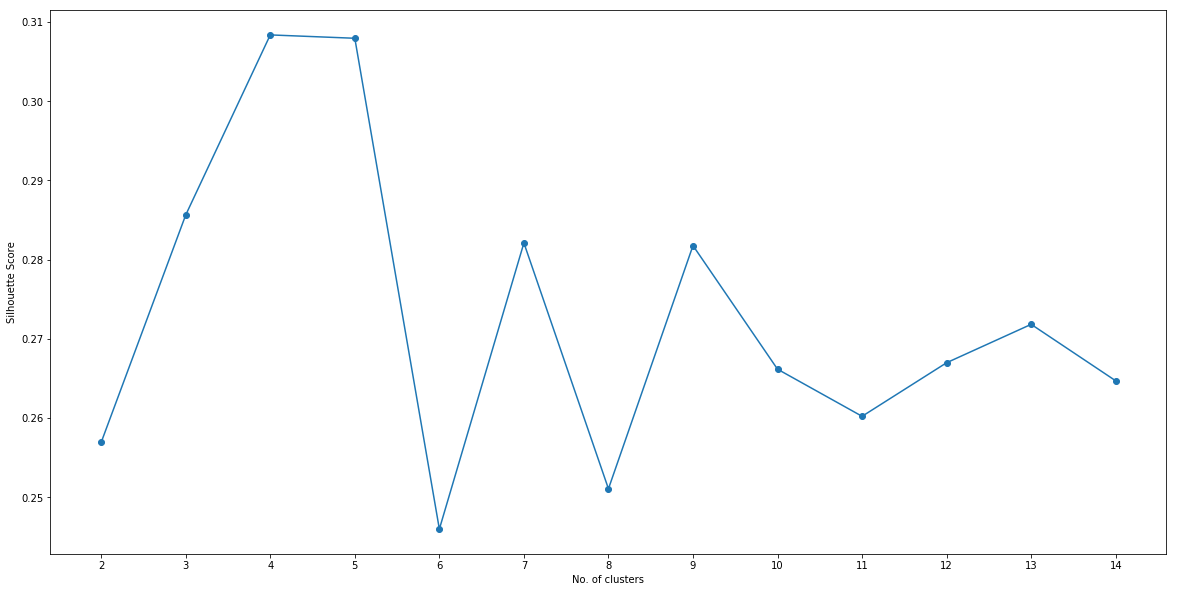

In [173]:
#Import Metrics from sklearn
from sklearn.metrics import silhouette_samples, silhouette_score
#Import matplotlib inline
import matplotlib.pyplot as plt

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()
    
indices = []
scores = []
max_range = 15

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    CKT = Chicago_K_test
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(CKT)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(CKT, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)    

plot(max_range, scores, "No. of clusters", "Silhouette Score")

#### Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

#### Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster (FROM: scikit_learn.org).

### So, The Optimal Value for K is K=4

In [153]:
# set number of clusters out, referenced from the optimal K Value previous calculated. 
k = 4

Chicago_grouped_clustering = Chicago_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(Chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 
# to change use .astype()

array([0, 1, 3, 2, 0, 3, 0, 2, 3, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       1, 1, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0],
      dtype=int32)

### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [36]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Chicago_merged = Chicago_restaurants

# merge Chicago_restaurants with Chicago_grouped to add latitude/longitude for each neighborhood
Chicago_merged = Chicago_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Chicago_merged.fillna(0)
Chicago_merged.head(10) # check the last columns!

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Albany Park\n,41.971937,-87.716174,Peking Mandarin Resturant,41.968292,-87.715783,Chinese Restaurant,0,Korean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Cuban Restaurant,American Restaurant,Thai Restaurant,Chinese Restaurant,Seafood Restaurant,English Restaurant,Greek Restaurant
6,Albany Park\n,41.971937,-87.716174,Banpojung,41.975707,-87.715609,Korean Restaurant,0,Korean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Cuban Restaurant,American Restaurant,Thai Restaurant,Chinese Restaurant,Seafood Restaurant,English Restaurant,Greek Restaurant
13,Riverdale\n,41.654864,-87.600446,Garden Fast Food,41.656362,-87.597713,Fast Food Restaurant,2,Fast Food Restaurant,Vietnamese Restaurant,Indian Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant
15,Edgewater\n,41.977139,-87.669273,Taste of Lebanon,41.976151,-87.668847,Middle Eastern Restaurant,0,Mexican Restaurant,Asian Restaurant,Sushi Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,American Restaurant,Greek Restaurant,Korean Restaurant,Mediterranean Restaurant
23,Edgewater\n,41.977139,-87.669273,Ora,41.975715,-87.668389,Sushi Restaurant,0,Mexican Restaurant,Asian Restaurant,Sushi Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,American Restaurant,Greek Restaurant,Korean Restaurant,Mediterranean Restaurant
28,Edgewater\n,41.977139,-87.669273,Andies Restaurant,41.977720,-87.668364,Mediterranean Restaurant,0,Mexican Restaurant,Asian Restaurant,Sushi Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,American Restaurant,Greek Restaurant,Korean Restaurant,Mediterranean Restaurant
31,Edgewater\n,41.977139,-87.669273,Polygon Cafe,41.976375,-87.668551,Asian Restaurant,0,Mexican Restaurant,Asian Restaurant,Sushi Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,American Restaurant,Greek Restaurant,Korean Restaurant,Mediterranean Restaurant
34,Edgewater\n,41.977139,-87.669273,Calo Ristorante,41.979356,-87.667952,Italian Restaurant,0,Mexican Restaurant,Asian Restaurant,Sushi Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,American Restaurant,Greek Restaurant,Korean Restaurant,Mediterranean Restaurant
38,Edgewater\n,41.977139,-87.669273,Big Jones,41.979509,-87.668251,Southern / Soul Food Restaurant,0,Mexican Restaurant,Asian Restaurant,Sushi Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,American Restaurant,Greek Restaurant,Korean Restaurant,Mediterranean Restaurant
39,Edgewater\n,41.977139,-87.669273,Jin Ju,41.976305,-87.668467,Korean Restaurant,0,Mexican Restaurant,Asian Restaurant,Sushi Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,American Restaurant,Greek Restaurant,Korean Restaurant,Mediterranean Restaurant


## Create a map, showing the cluters distribution. 

In [146]:
# create map of Obtained Chicago Clusters using latitude and longitude values
map_chicago_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Chicago_merged['Venue Latitude'], Chicago_merged['Venue Longitude'], Chicago_merged['Neighborhood'], Chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_chicago_clusters)
       
map_chicago_clusters

### Number of Restaurant venues belonging to each cluster

In [104]:
Chicago_merged['Cluster Labels'].value_counts()

0    677
1    128
2     49
3     48
Name: Cluster Labels, dtype: int64

# RESULTS: Discovering and Examining Clustering

## Cluster 0

## Generation a DataFrame with only information of restaurants classified in Cluster 0

In [147]:
Chicago_Cluster0 = Chicago_merged.loc[Chicago_merged['Cluster Labels'] == 0]
Chicago_Cluster0.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Albany Park\n,41.971937,-87.716174,Peking Mandarin Resturant,41.968292,-87.715783,Chinese Restaurant,0,Korean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Cuban Restaurant,American Restaurant,Thai Restaurant,Chinese Restaurant,Seafood Restaurant,English Restaurant,Greek Restaurant
6,Albany Park\n,41.971937,-87.716174,Banpojung,41.975707,-87.715609,Korean Restaurant,0,Korean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Cuban Restaurant,American Restaurant,Thai Restaurant,Chinese Restaurant,Seafood Restaurant,English Restaurant,Greek Restaurant
15,Edgewater\n,41.977139,-87.669273,Taste of Lebanon,41.976151,-87.668847,Middle Eastern Restaurant,0,Mexican Restaurant,Asian Restaurant,Sushi Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,American Restaurant,Greek Restaurant,Korean Restaurant,Mediterranean Restaurant
23,Edgewater\n,41.977139,-87.669273,Ora,41.975715,-87.668389,Sushi Restaurant,0,Mexican Restaurant,Asian Restaurant,Sushi Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,American Restaurant,Greek Restaurant,Korean Restaurant,Mediterranean Restaurant
28,Edgewater\n,41.977139,-87.669273,Andies Restaurant,41.977720,-87.668364,Mediterranean Restaurant,0,Mexican Restaurant,Asian Restaurant,Sushi Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,American Restaurant,Greek Restaurant,Korean Restaurant,Mediterranean Restaurant
31,Edgewater\n,41.977139,-87.669273,Polygon Cafe,41.976375,-87.668551,Asian Restaurant,0,Mexican Restaurant,Asian Restaurant,Sushi Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,American Restaurant,Greek Restaurant,Korean Restaurant,Mediterranean Restaurant
34,Edgewater\n,41.977139,-87.669273,Calo Ristorante,41.979356,-87.667952,Italian Restaurant,0,Mexican Restaurant,Asian Restaurant,Sushi Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,American Restaurant,Greek Restaurant,Korean Restaurant,Mediterranean Restaurant
38,Edgewater\n,41.977139,-87.669273,Big Jones,41.979509,-87.668251,Southern / Soul Food Restaurant,0,Mexican Restaurant,Asian Restaurant,Sushi Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,American Restaurant,Greek Restaurant,Korean Restaurant,Mediterranean Restaurant
39,Edgewater\n,41.977139,-87.669273,Jin Ju,41.976305,-87.668467,Korean Restaurant,0,Mexican Restaurant,Asian Restaurant,Sushi Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,American Restaurant,Greek Restaurant,Korean Restaurant,Mediterranean Restaurant
43,Edgewater\n,41.977139,-87.669273,Reza's,41.977925,-87.668356,Middle Eastern Restaurant,0,Mexican Restaurant,Asian Restaurant,Sushi Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,American Restaurant,Greek Restaurant,Korean Restaurant,Mediterranean Restaurant


### Generation of a DataFrame to identify the two most popular and the two less popular restaurant categories in Cluster 0

In [148]:
Chicago_Cluster0_drop = Chicago_Cluster0
Chicago_Cluster0_drop = Chicago_Cluster0_drop.drop (columns = ['Neighborhood Latitude', 'Neighborhood Longitude','Venue','Venue Latitude', 'Venue Longitude', 'Venue Category', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue', '6th Most Common Venue', '7th Most Common Venue', '8th Most Common Venue'])
Chicago_Cluster0_drop.head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Albany Park\n,0,Korean Restaurant,Mexican Restaurant,English Restaurant,Greek Restaurant
6,Albany Park\n,0,Korean Restaurant,Mexican Restaurant,English Restaurant,Greek Restaurant
15,Edgewater\n,0,Mexican Restaurant,Asian Restaurant,Korean Restaurant,Mediterranean Restaurant
23,Edgewater\n,0,Mexican Restaurant,Asian Restaurant,Korean Restaurant,Mediterranean Restaurant
28,Edgewater\n,0,Mexican Restaurant,Asian Restaurant,Korean Restaurant,Mediterranean Restaurant


#### Discovering the 1st Most Common Restaurant Venue found in Cluster 0

In [149]:
n = 2
Most_Popular_Cluster0 = pd.DataFrame(Chicago_Cluster0_drop['1st Most Common Venue'].value_counts()[:n].index.tolist(),columns =["Most Common Venues"]) 
Most_Popular_Cluster0

,Most Common Venues
0,American Restaurant
1,Mexican Restaurant


#### Discovering the 10th Most Common (or less popular) Restaurant Venue found in Cluster 0

In [150]:
n = 2
Less_Popular_Cluster0 = pd.DataFrame(Chicago_Cluster0_drop['10th Most Common Venue'].value_counts()[:n].index.tolist(),columns =["Less Common Venues"])  
Less_Popular_Cluster0

,Less Common Venues
0,Greek Restaurant
1,Restaurant


### Merging the dataframes,  in order to show the most and less popular Restaurante Venues in Cluster 0.

In [151]:
df_Venues_Cluster0 = pd.concat([Most_Popular_Cluster0,Less_Popular_Cluster0], axis=1)
df_Venues_Cluster0.insert (0, "Cluster Label", 0)
df_Venues_Cluster0

,Cluster Label,Most Common Venues,Less Common Venues
0,0,American Restaurant,Greek Restaurant
1,0,Mexican Restaurant,Restaurant


### Mapping the restaurant venues which belong to Cluster 0

In [152]:
c0_table = Chicago_merged.loc[Chicago_merged['Cluster Labels'] == 0, Chicago_merged.columns[[0]+[3]+[4]+[5]+list(range(8, Chicago_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c0_table['Venue Latitude'], c0_table['Venue Longitude'], c0_table['Venue'], c0_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
    #count += 1
map_clusters

NameError: name 'kclusters' is not defined

## Cluster 1

### Generation a DataFrame with only information of restaurants classified in Cluster 1

In [114]:
Chicago_Cluster1 = Chicago_merged.loc[Chicago_merged['Cluster Labels'] == 1]
Chicago_Cluster1.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
87,Archer Heights\n,41.811422,-87.726165,El Asador,41.807535,-87.726920,Mexican Restaurant,1,Mexican Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
97,Archer Heights\n,41.811422,-87.726165,Taqueria Ochoas,41.807627,-87.727960,Mexican Restaurant,1,Mexican Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
199,Belmont Cragin\n,41.931698,-87.768670,Taconazo,41.929640,-87.766087,Mexican Restaurant,1,Mexican Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,American Restaurant,Cuban Restaurant,Vietnamese Restaurant,English Restaurant,Halal Restaurant,Greek Restaurant
200,Belmont Cragin\n,41.931698,-87.768670,Golden Nugget,41.935193,-87.766229,American Restaurant,1,Mexican Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,American Restaurant,Cuban Restaurant,Vietnamese Restaurant,English Restaurant,Halal Restaurant,Greek Restaurant
201,Belmont Cragin\n,41.931698,-87.768670,Taqueria Diversey,41.930905,-87.768347,Mexican Restaurant,1,Mexican Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,American Restaurant,Cuban Restaurant,Vietnamese Restaurant,English Restaurant,Halal Restaurant,Greek Restaurant
207,Belmont Cragin\n,41.931698,-87.768670,La Esquinita,41.931492,-87.769624,Mexican Restaurant,1,Mexican Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,American Restaurant,Cuban Restaurant,Vietnamese Restaurant,English Restaurant,Halal Restaurant,Greek Restaurant
208,Belmont Cragin\n,41.931698,-87.768670,Yummy Yummy Restaurant,41.931128,-87.767241,Restaurant,1,Mexican Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,American Restaurant,Cuban Restaurant,Vietnamese Restaurant,English Restaurant,Halal Restaurant,Greek Restaurant
210,Belmont Cragin\n,41.931698,-87.768670,Super Taqueria El Aconaz Restaurant,41.929783,-87.766105,Mexican Restaurant,1,Mexican Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,American Restaurant,Cuban Restaurant,Vietnamese Restaurant,English Restaurant,Halal Restaurant,Greek Restaurant
212,Belmont Cragin\n,41.931698,-87.768670,Chinese Chef's Kitchen,41.928698,-87.765820,Chinese Restaurant,1,Mexican Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,American Restaurant,Cuban Restaurant,Vietnamese Restaurant,English Restaurant,Halal Restaurant,Greek Restaurant
215,Hermosa\n,41.938554,-87.728743,Wendy’s,41.939274,-87.731224,Fast Food Restaurant,1,Mexican Restaurant,American Restaurant,Latin American Restaurant,Chinese Restaurant,Seafood Restaurant,Fast Food Restaurant,Vietnamese Restaurant,English Restaurant,Halal Restaurant,Greek Restaurant


### Generation of a DataFrame to identify the two most popular and the two less popular restaurant categories in Cluster 1

In [115]:
Chicago_Cluster1_drop = Chicago_Cluster1
Chicago_Cluster1_drop = Chicago_Cluster1_drop.drop (columns = ['Neighborhood Latitude', 'Neighborhood Longitude','Venue','Venue Latitude', 'Venue Longitude', 'Venue Category', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue', '6th Most Common Venue', '7th Most Common Venue', '8th Most Common Venue'])
Chicago_Cluster1_drop.head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,9th Most Common Venue,10th Most Common Venue
87,Archer Heights\n,1,Mexican Restaurant,Vietnamese Restaurant,Filipino Restaurant,Fast Food Restaurant
97,Archer Heights\n,1,Mexican Restaurant,Vietnamese Restaurant,Filipino Restaurant,Fast Food Restaurant
199,Belmont Cragin\n,1,Mexican Restaurant,Chinese Restaurant,Halal Restaurant,Greek Restaurant
200,Belmont Cragin\n,1,Mexican Restaurant,Chinese Restaurant,Halal Restaurant,Greek Restaurant
201,Belmont Cragin\n,1,Mexican Restaurant,Chinese Restaurant,Halal Restaurant,Greek Restaurant


#### Discovering the 1st Most Common Restaurant Venue found in Cluster 1

In [116]:
n = 2
Most_Popular_Cluster1 = pd.DataFrame(Chicago_Cluster1_drop['1st Most Common Venue'].value_counts()[:n].index.tolist(),columns =["Most Common Venues"]) 
Most_Popular_Cluster1

,Most Common Venues
0,Mexican Restaurant
1,Italian Restaurant


#### Discovering the 10th Less Common (or less popular) Restaurant Venue found in Cluster 1

In [117]:
n = 2
Less_Popular_Cluster1 = pd.DataFrame(Chicago_Cluster1_drop['10th Most Common Venue'].value_counts()[:n].index.tolist(),columns =["Less Common Venues"])  
Less_Popular_Cluster1

,Less Common Venues
0,German Restaurant
1,Greek Restaurant


### Merging the dataframes, in order to show the most and less popular Restaurante Venues in Cluster 1.

In [133]:
df_Venues_Cluster1 = pd.concat([Most_Popular_Cluster1,Less_Popular_Cluster1], axis=1)
df_Venues_Cluster1.insert (0, "Cluster Label", 1)
df_Venues_Cluster1

,Cluster Label,Most Common Venues,Less Common Venues
0,1,Mexican Restaurant,German Restaurant
1,1,Italian Restaurant,Greek Restaurant


### Mapping the restaurant venues which belong to Cluster 1

In [154]:
c1_table = Chicago_merged.loc[Chicago_merged['Cluster Labels'] == 1, Chicago_merged.columns[[0]+[3]+[4]+[5]+list(range(8, Chicago_merged.shape[1]))]]
# create map
map_clusters1 = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c1_table['Venue Latitude'], c1_table['Venue Longitude'], c1_table['Venue'], c1_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-13],
        fill=True,
        fill_color=rainbow[int(cluster)-13],
        fill_opacity=0.7).add_to(map_clusters1)
    #count += 1
map_clusters1

NameError: name 'kclusters' is not defined

## Cluster 2

### Generation a DataFrame with only information of restaurants classified in Cluster 2

In [119]:
Chicago_Cluster2 = Chicago_merged.loc[Chicago_merged['Cluster Labels'] == 2]
Chicago_Cluster2.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Riverdale\n,41.654864,-87.600446,Garden Fast Food,41.656362,-87.597713,Fast Food Restaurant,2,Fast Food Restaurant,Vietnamese Restaurant,Indian Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant
111,Ashburn\n,41.749352,-87.713514,Just Tacos Taquera El Sabor de Mexico,41.749818,-87.717886,Mexican Restaurant,2,Fast Food Restaurant,Italian Restaurant,Mexican Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant
124,Avalon Park\n,41.745035,-87.588658,Nita's Gumbo,41.747684,-87.586200,Cajun / Creole Restaurant,2,Fast Food Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Seafood Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant
130,Avalon Park\n,41.745035,-87.588658,Just Turkey Restaurant,41.744030,-87.585176,Fast Food Restaurant,2,Fast Food Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Seafood Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant
132,Avalon Park\n,41.745035,-87.588658,Mama'z Beef,41.747697,-87.586300,Fast Food Restaurant,2,Fast Food Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Seafood Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant
249,Dunning\n,41.937605,-87.833826,Goody Fast Food,41.937588,-87.832983,Fast Food Restaurant,2,American Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant
291,Morgan Park\n,41.683386,-87.681244,Pepe's Mexican Restaraunt,41.681056,-87.680975,Mexican Restaurant,2,Fast Food Restaurant,Mexican Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant
292,Morgan Park\n,41.683386,-87.681244,Joey’s Red Hots,41.684206,-87.681230,Fast Food Restaurant,2,Fast Food Restaurant,Mexican Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant
668,Chatham\n,41.741145,-87.612548,Red Snapper,41.744112,-87.614350,Fast Food Restaurant,2,Fast Food Restaurant,Vietnamese Restaurant,Indian Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant
676,Chicago Lawn\n,41.775033,-87.696441,Captain Hooks Fish & Chicken,41.772358,-87.693379,Fast Food Restaurant,2,Fast Food Restaurant,American Restaurant,Mexican Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant


### Generation of a DataFrame to identify the two most popular and two less popular restaurant categories in Cluster 2

In [120]:
Chicago_Cluster2_drop = Chicago_Cluster2
Chicago_Cluster2_drop = Chicago_Cluster2_drop.drop (columns = ['Neighborhood Latitude', 'Neighborhood Longitude','Venue','Venue Latitude', 'Venue Longitude', 'Venue Category', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue', '6th Most Common Venue', '7th Most Common Venue', '8th Most Common Venue'])
Chicago_Cluster2_drop.head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Riverdale\n,2,Fast Food Restaurant,Vietnamese Restaurant,Filipino Restaurant,Falafel Restaurant
111,Ashburn\n,2,Fast Food Restaurant,Italian Restaurant,French Restaurant,Filipino Restaurant
124,Avalon Park\n,2,Fast Food Restaurant,Cajun / Creole Restaurant,Greek Restaurant,German Restaurant
130,Avalon Park\n,2,Fast Food Restaurant,Cajun / Creole Restaurant,Greek Restaurant,German Restaurant
132,Avalon Park\n,2,Fast Food Restaurant,Cajun / Creole Restaurant,Greek Restaurant,German Restaurant


#### Discovering the 1st Most Common Restaurant Venue found in Cluster 2

In [121]:
n = 2
Most_Popular_Cluster2 = pd.DataFrame(Chicago_Cluster2_drop['1st Most Common Venue'].value_counts()[:n].index.tolist(),columns =["Most Common Venues"]) 
Most_Popular_Cluster2

,Most Common Venues
0,Fast Food Restaurant
1,American Restaurant


#### Discovering the 10th Less Common (or less popular) Restaurant Venue found in Cluster 2

In [122]:
n = 2
Less_Popular_Cluster2 = pd.DataFrame(Chicago_Cluster2_drop['10th Most Common Venue'].value_counts()[:n].index.tolist(),columns =["Less Common Venues"])  
Less_Popular_Cluster2

,Less Common Venues
0,Filipino Restaurant
1,French Restaurant


### Merging the dataframes, in order to show the most and less popular Restaurante Venues in Cluster 2.

In [132]:
df_Venues_Cluster2 = pd.concat([Most_Popular_Cluster2,Less_Popular_Cluster2], axis=1)
df_Venues_Cluster2.insert (0, "Cluster Label", 2)
df_Venues_Cluster2

,Cluster Label,Most Common Venues,Less Common Venues
0,2,Fast Food Restaurant,Filipino Restaurant
1,2,American Restaurant,French Restaurant


### Mapping the restaurant venues which belong to Cluster 2

In [104]:
c2_table = Chicago_merged.loc[Chicago_merged['Cluster Labels'] == 2, Chicago_merged.columns[[0]+[3]+[4]+[5]+list(range(8, Chicago_merged.shape[1]))]]
# create map
map_clusters2 = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c2_table['Venue Latitude'], c2_table['Venue Longitude'], c2_table['Venue'], c2_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-9],
        fill=True,
        fill_color=rainbow[int(cluster)-9],
        fill_opacity=0.5).add_to(map_clusters2)
    #count += 1
map_clusters2

## Cluster 3

### Generation a DataFrame with only information of restaurants classified in Cluster 3

In [125]:
Chicago_Cluster3 = Chicago_merged.loc[Chicago_merged['Cluster Labels'] == 3]
Chicago_Cluster3.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
102,Armour Square\n,41.840033,-87.633107,New Furama Restaurant,41.841439,-87.631359,Chinese Restaurant,3,Chinese Restaurant,Asian Restaurant,Dim Sum Restaurant,Korean Restaurant,Italian Restaurant,Taiwanese Restaurant,Fast Food Restaurant,Hotpot Restaurant,Ramen Restaurant,English Restaurant
103,Armour Square\n,41.840033,-87.633107,Chinese Kitchen,41.838226,-87.637581,Chinese Restaurant,3,Chinese Restaurant,Asian Restaurant,Dim Sum Restaurant,Korean Restaurant,Italian Restaurant,Taiwanese Restaurant,Fast Food Restaurant,Hotpot Restaurant,Ramen Restaurant,English Restaurant
104,Armour Square\n,41.840033,-87.633107,Franco's Ristorante,41.838273,-87.634155,Italian Restaurant,3,Chinese Restaurant,Asian Restaurant,Dim Sum Restaurant,Korean Restaurant,Italian Restaurant,Taiwanese Restaurant,Fast Food Restaurant,Hotpot Restaurant,Ramen Restaurant,English Restaurant
105,Armour Square\n,41.840033,-87.633107,Dragon Bowl,41.838410,-87.632549,Asian Restaurant,3,Chinese Restaurant,Asian Restaurant,Dim Sum Restaurant,Korean Restaurant,Italian Restaurant,Taiwanese Restaurant,Fast Food Restaurant,Hotpot Restaurant,Ramen Restaurant,English Restaurant
107,Armour Square\n,41.840033,-87.633107,Dim Dim Dim-Sum & Bakery,41.841986,-87.631896,Chinese Restaurant,3,Chinese Restaurant,Asian Restaurant,Dim Sum Restaurant,Korean Restaurant,Italian Restaurant,Taiwanese Restaurant,Fast Food Restaurant,Hotpot Restaurant,Ramen Restaurant,English Restaurant
109,Armour Square\n,41.840033,-87.633107,Ferros,41.838356,-87.632138,Fast Food Restaurant,3,Chinese Restaurant,Asian Restaurant,Dim Sum Restaurant,Korean Restaurant,Italian Restaurant,Taiwanese Restaurant,Fast Food Restaurant,Hotpot Restaurant,Ramen Restaurant,English Restaurant
110,Armour Square\n,41.840033,-87.633107,Macau Doulao Cruisine,41.841856,-87.632131,Asian Restaurant,3,Chinese Restaurant,Asian Restaurant,Dim Sum Restaurant,Korean Restaurant,Italian Restaurant,Taiwanese Restaurant,Fast Food Restaurant,Hotpot Restaurant,Ramen Restaurant,English Restaurant
142,Avondale\n,41.938921,-87.711168,중부시장,41.941935,-87.712229,Korean Restaurant,3,Chinese Restaurant,Korean Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant
148,Avondale\n,41.938921,-87.711168,Eat First #1 Chinese Restaurant,41.939157,-87.711639,Chinese Restaurant,3,Chinese Restaurant,Korean Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant
155,Avondale\n,41.938921,-87.711168,Buffet Castle,41.939423,-87.711933,Chinese Restaurant,3,Chinese Restaurant,Korean Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant


### Generation of a DataFrame to identify the two most popular and two less popular restaurant categories in Cluster 3

In [127]:
Chicago_Cluster3_drop = Chicago_Cluster3
Chicago_Cluster3_drop = Chicago_Cluster3_drop.drop (columns = ['Neighborhood Latitude', 'Neighborhood Longitude','Venue','Venue Latitude', 'Venue Longitude', 'Venue Category', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue', '6th Most Common Venue', '7th Most Common Venue', '8th Most Common Venue'])
Chicago_Cluster3_drop.head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,9th Most Common Venue,10th Most Common Venue
102,Armour Square\n,3,Chinese Restaurant,Asian Restaurant,Ramen Restaurant,English Restaurant
103,Armour Square\n,3,Chinese Restaurant,Asian Restaurant,Ramen Restaurant,English Restaurant
104,Armour Square\n,3,Chinese Restaurant,Asian Restaurant,Ramen Restaurant,English Restaurant
105,Armour Square\n,3,Chinese Restaurant,Asian Restaurant,Ramen Restaurant,English Restaurant
107,Armour Square\n,3,Chinese Restaurant,Asian Restaurant,Ramen Restaurant,English Restaurant


#### Discovering the 1st Most Common Restaurant Venue found in Cluster 3

In [128]:
n = 2
Most_Popular_Cluster3 = pd.DataFrame(Chicago_Cluster3_drop['1st Most Common Venue'].value_counts()[:n].index.tolist(),columns =["Most Common Venues"]) 
Most_Popular_Cluster3

,Most Common Venues
0,Chinese Restaurant


#### Discovering the 10th Less Common (or less popular) Restaurant Venue found in Cluster 3

In [129]:
n = 2
Less_Popular_Cluster3 = pd.DataFrame(Chicago_Cluster3_drop['10th Most Common Venue'].value_counts()[:n].index.tolist(),columns =["Less Common Venues"])  
Less_Popular_Cluster3

,Less Common Venues
0,English Restaurant
1,Filipino Restaurant


### Merging the dataframes, in order to show the most and less popular Restaurante Venues in Cluster 3.

In [144]:
df_Venues_Cluster3 = pd.concat([Most_Popular_Cluster3,Less_Popular_Cluster3], axis=1)
df_Venues_Cluster3.insert (0, "Cluster Label", 3)
df_Venues_Cluster3

,Cluster Label,Most Common Venues,Less Common Venues
0,3,Chinese Restaurant,English Restaurant
1,3,NaN,Filipino Restaurant


### Mapping the restaurant venues which belong to Cluster 3

In [145]:
c3_table = Chicago_merged.loc[Chicago_merged['Cluster Labels'] == 3, Chicago_merged.columns[[0]+[3]+[4]+[5]+list(range(8, Chicago_merged.shape[1]))]]
# create map
map_clusters3 = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c3_table['Venue Latitude'], c3_table['Venue Longitude'], c3_table['Venue'], c3_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-6],
        fill=True,
        fill_color=rainbow[int(cluster)-6],
        fill_opacity=0.7).add_to(map_clusters3)
    #count += 1
map_clusters3

NameError: name 'kclusters' is not defined

# DISCUSSION

# CONCLUSION